# A brief introduction to the Python netCDF4 package

In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import gdal
import netCDF4 as nc

%run ../../COMMON/plot_and_table_functions.py

In [23]:
def create_file_reference( component_name ):
    '''
    This is a simple convenience function that will form a path and filename to a
    given water budget component
    '''
    # specify the prefix, path to SWB2 output, timeframe, and resolution
    output_path = '../output/'
    prefix      = 'central_sands_'
    start_year  = '2012'
    end_year    = '2013'
    ncol        = '300'
    nrow        = '150'
    return( output_path + prefix + component_name + '_' + start_year + '_' 
          + end_year + '__' + nrow + '_by_' + ncol + '.nc' )

SWB version 2.0 currently writes all components of the water balance to NetCDF files. Each water balance component is written to a separate file.

    output/central_sands_actual_et_2012_2013__150_by_300.nc
    output/central_sands_crop_et_2012_2013__150_by_300.nc
    output/central_sands_gdd_2012_2013__150_by_300.nc
    output/central_sands_gross_precipitation_2012_2013__150_by_300.nc
    output/central_sands_infiltration_2012_2013__150_by_300.nc
    output/central_sands_interception_2012_2013__150_by_300.nc
    output/central_sands_irrigation_2012_2013__150_by_300.nc
    output/central_sands_net_infiltration_2012_2013__150_by_300.nc
    output/central_sands_rainfall_2012_2013__150_by_300.nc
    output/central_sands_reference_ET0_2012_2013__150_by_300.nc
    output/central_sands_rejected_net_infiltration_2012_2013__150_by_300.nc
    output/central_sands_runoff_2012_2013__150_by_300.nc
    output/central_sands_runoff_outside_2012_2013__150_by_300.nc
    output/central_sands_runon_2012_2013__150_by_300.nc
    output/central_sands_snow_storage_2012_2013__150_by_300.nc
    output/central_sands_snowfall_2012_2013__150_by_300.nc
    output/central_sands_snowmelt_2012_2013__150_by_300.nc
    output/central_sands_soil_storage_2012_2013__150_by_300.nc
    output/central_sands_tmax_2012_2013__150_by_300.nc
    output/central_sands_tmin_2012_2013__150_by_300.nc
    
$$soil\:moisture_{t} = soil\:moisture_{t-1} + rainfall + snowmelt + runon + irrigation - net\:infiltration - runoff - actual\:et$$


In [24]:
create_file_reference( 'net_infiltration' )

'../output/central_sands_net_infiltration_2012_2013__150_by_300.nc'

In [28]:
net_infil = nc.Dataset( create_file_reference( 'net_infiltration') )

if net_infil is None:
    print('Could not open SWB 2.0 NetCDF grid file')
    sys.exit(1)

In [38]:
net_infil_vals_nc = net_infil.variables[ 'net_infiltration' ]
x_vals_nc = net_infil.variables[ 'x' ]
y_vals_nc = net_infil.variables[ 'y' ]

The variable 'net_infil_vals_nc' now contains all of the daily values written by SWB 2.0 for the 'net_infiltration' variable. 'x_vals_nc' and 'y_vals_nc' contain, well, the projected x and y coordinates associated with the 'net_infiltration' grid output. Some basic information about this variable may be obtained by entering the variable name at the command line.

In [39]:
net_infil_vals_nc

<class 'netCDF4._netCDF4.Variable'>
float32 net_infiltration(time, y, x)
    units: inches_per_day
    valid_min: 0.0
    valid_max: 2000.0
    valid_range: [    0.  2000.]
    _FillValue: -9.9e-20
    coordinates: lat lon
    grid_mapping: crs
unlimited dimensions: time
current shape = (731, 150, 300)
filling on

In [46]:
x_vals_nc

<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    units: meter
    long_name: x coordinate of projection
    standard_name: projection_x_coordinate
unlimited dimensions: 
current shape = (300,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [47]:
y_vals_nc

<class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    units: meter
    long_name: y coordinate of projection
    standard_name: projection_y_coordinate
unlimited dimensions: 
current shape = (150,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [50]:
# create a numpy masked array from the netcdf variable values
net_infil_vals = ma.masked_where( np.isnan( net_infil_vals_nc ), net_infil_vals_nc ) 

x_vals = np.array( x_vals_nc )
y_vals = np.array( y_vals_nc )

In [57]:
# add up the grids for all 731 days in the simulation; divide by the number of years in the
# simulation to obtain the net infiltration sums on a mean annual basis
net_infil_sum = net_infil_vals.sum(axis=0) / 2.0

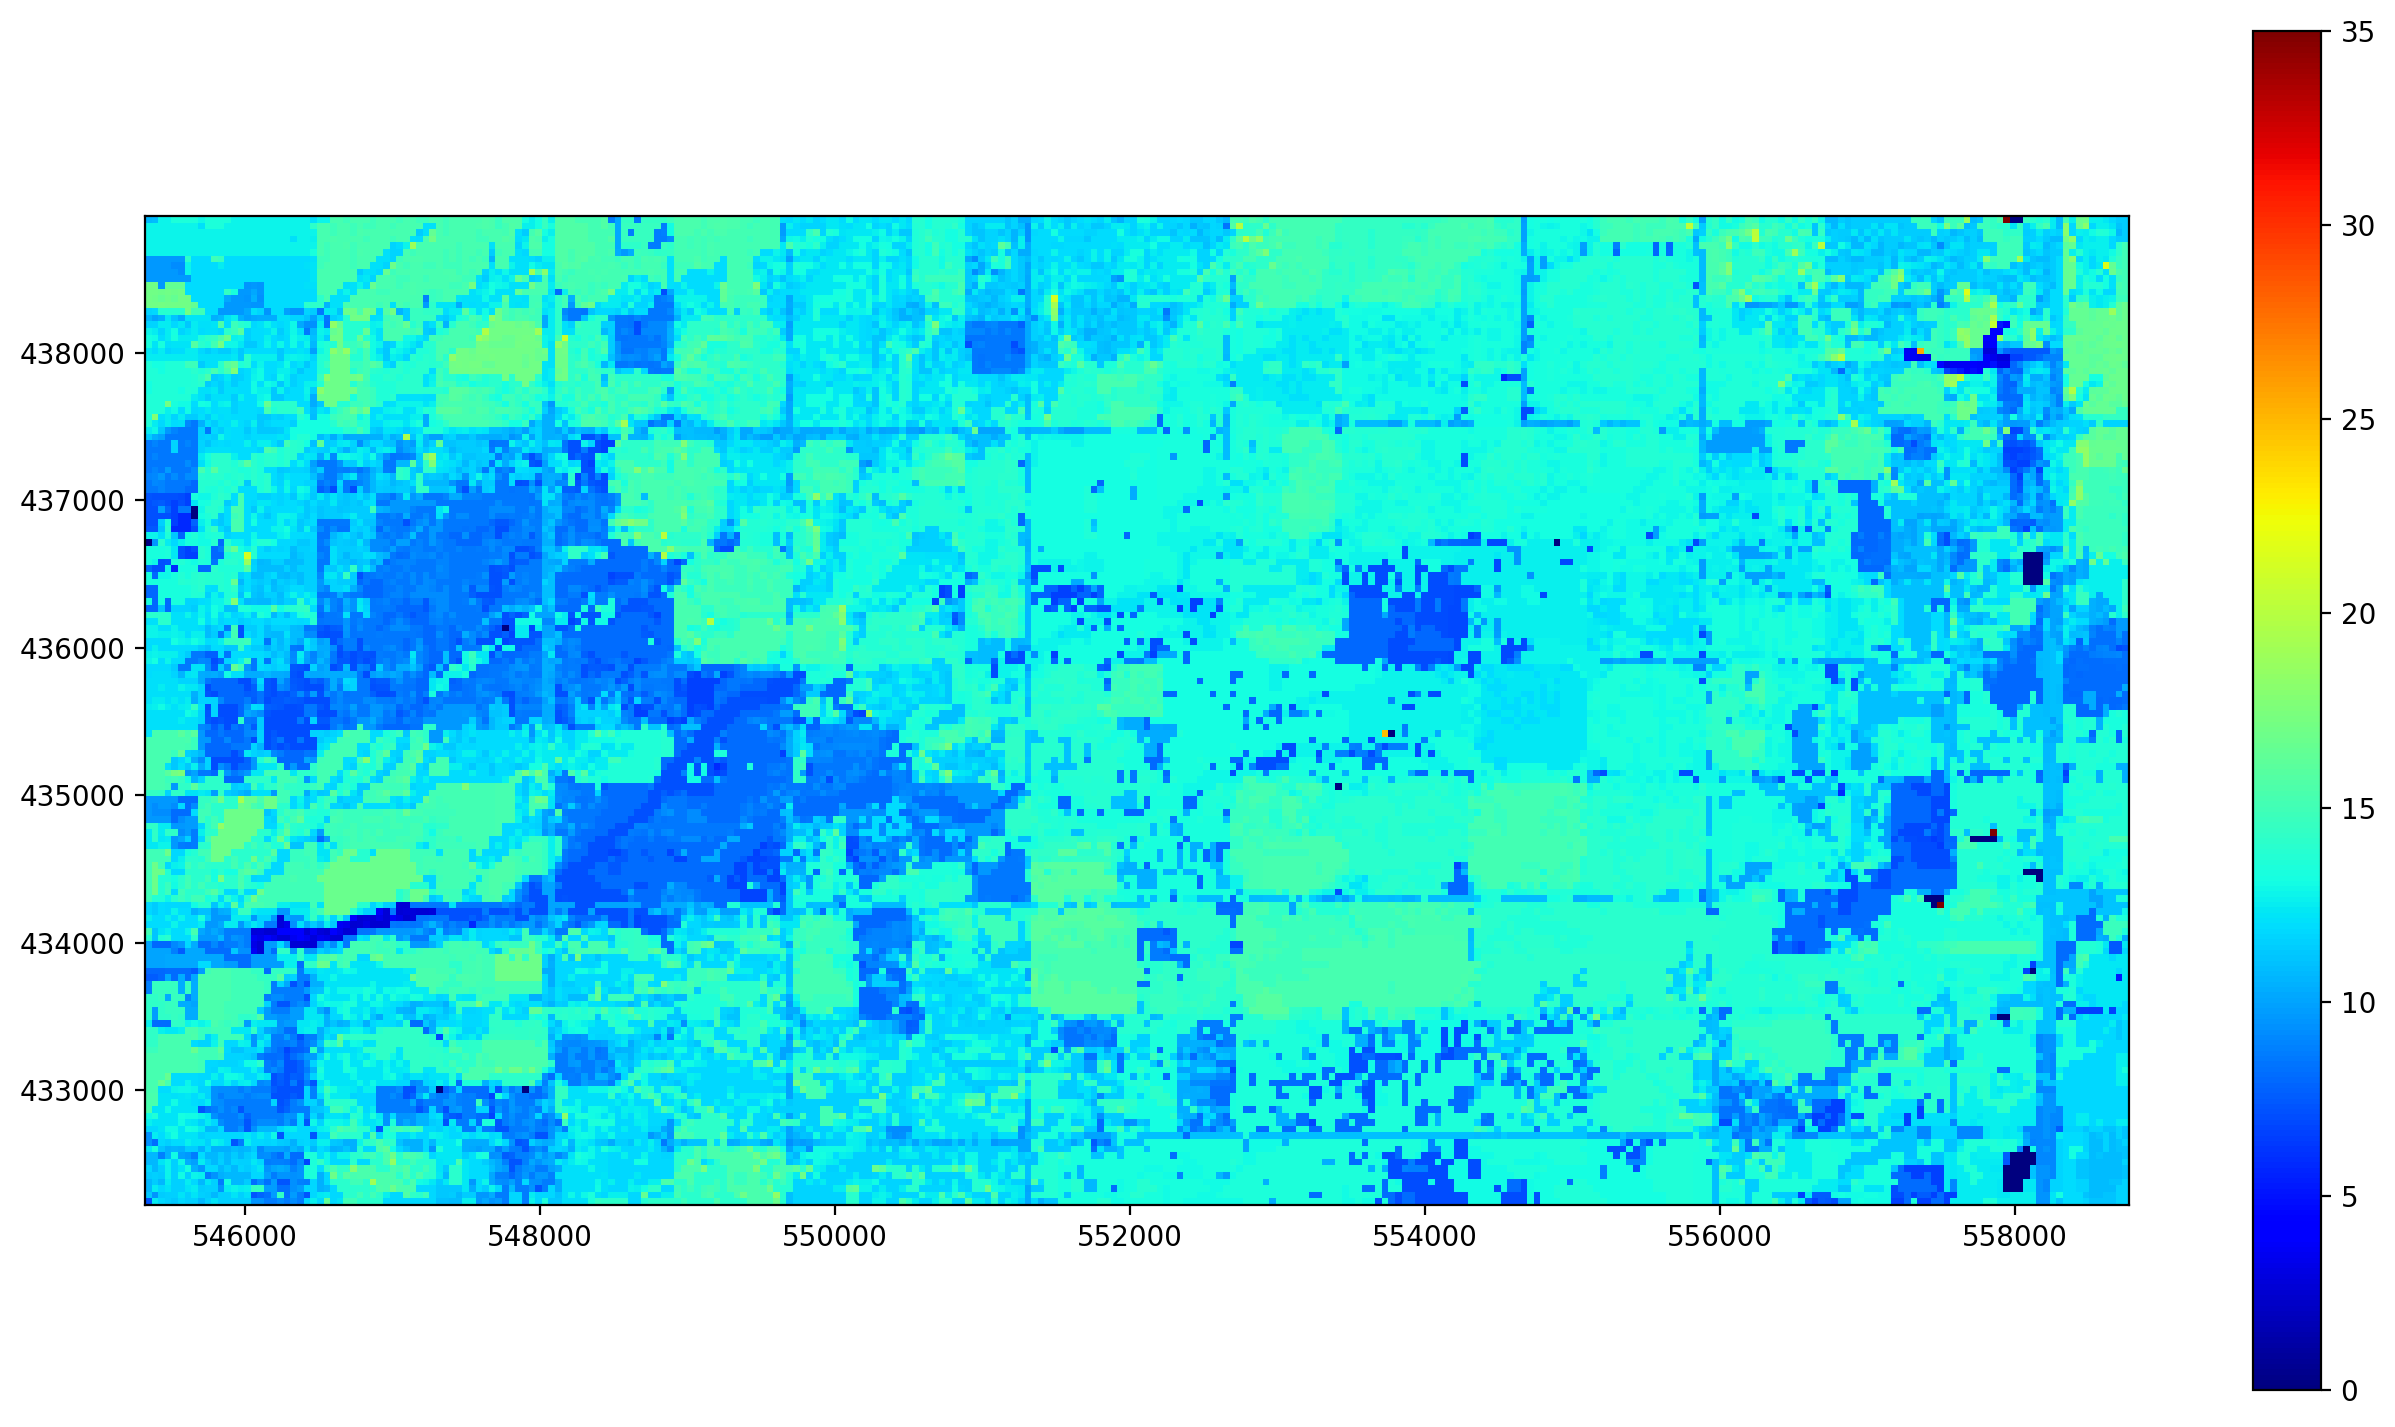

In [58]:
make_plot( x=x_vals, y=y_vals, var=net_infil_sum, maxz=35. )